In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
#only THESE columns will be taken for prediction
df = df[["Country", "EdLevel", "YearsCodePro", "Employment","ConvertedCompYearly"]]

In [4]:
#renaming convertedCompleteYearly column to salary
df=df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [5]:
#removing all the null values/'NAN' values from salary from salary column
df=df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [6]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [7]:
#removing all rows that has NAN values
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
#Only keeping data of "employed full time"value in Employement column
df = df[df["Employment"] == "Employed full-time"]

In [9]:
#removing employment column
df = df.drop("Employment", axis=1)

In [10]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [11]:
#counting the number of values of every country
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Lucia                                                1
Lesotho                                                    1
Burundi                                                    1
Cape Verde                                                 1
Guinea                                                     1
Name: Country, Length: 166, dtype: int64

In [12]:
#To select only country having more value than cut off:
#function:take parameteres of "country value" and "cutoff" then after comparison keeping only countries with maximum counts


def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

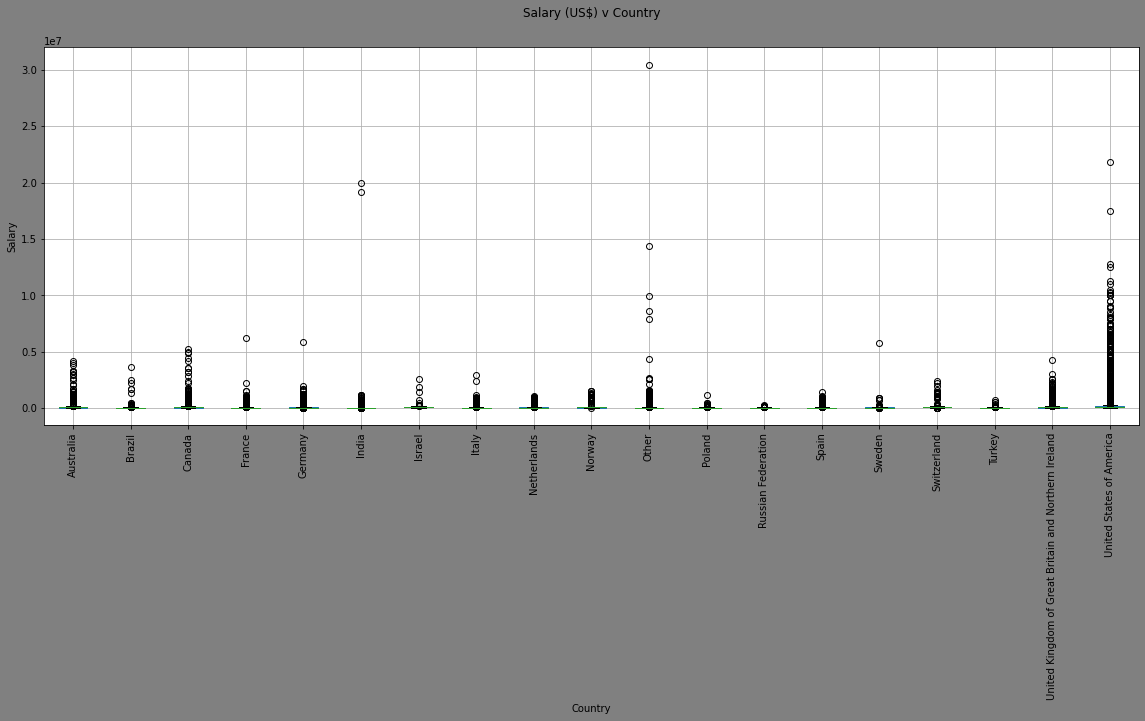

In [14]:
#graph between salary and country where box lies at the median of each coulmn
fig, ax = plt.subplots(1,1, figsize=(19, 7),facecolor ='grey')
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
#keeping salaries greater than "",lowe than "" & removing other row
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

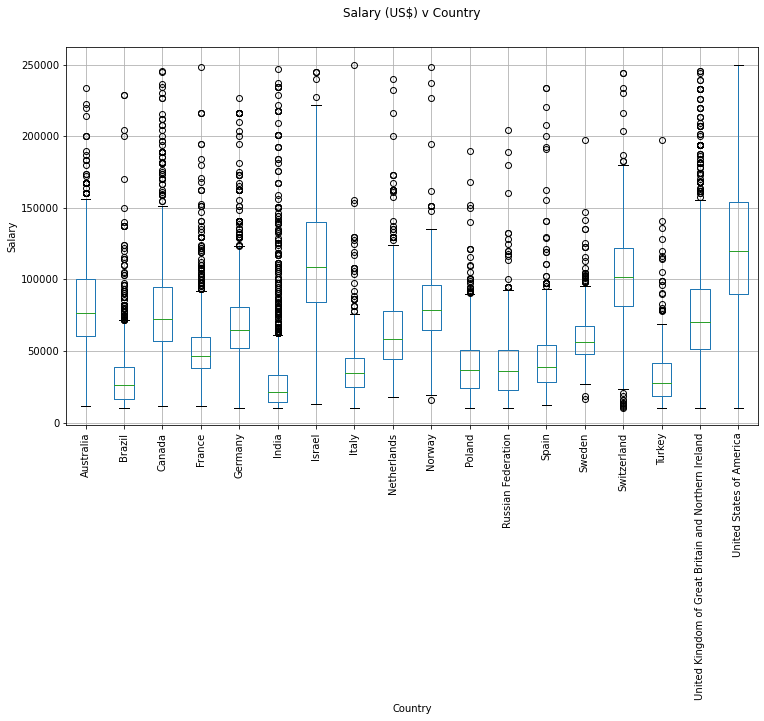

In [16]:
#after above manipulation in data graph looks like this
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
#taking out all unique values from expeirence column
df['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [18]:
def clean_experience(x):
    if x=='More than 50 years':
        return 50;
    if x=='Less than 1 year':
        return 0.5;
    return float(x)
df['YearsCodePro']=df['YearsCodePro'].apply(clean_experience)


In [19]:
#taking out all unique values from expeirence column
df['EdLevel'].unique()


array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [20]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [21]:
df['EdLevel'].unique()


array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [22]:
df['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'United States of America',
       'Brazil', 'Italy', 'Netherlands', 'Poland', 'Australia', 'India',
       'Norway'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 3, 1])

In [24]:

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [25]:
df['Salary']

9         51552.0
11        46482.0
12        77290.0
16        17748.0
17        46135.0
           ...   
83430    125000.0
83432     80169.0
83434    160500.0
83436     90000.0
83438     21168.0
Name: Salary, Length: 26230, dtype: float64

In [26]:
X=df.drop('Salary',axis=1)#features/input given to learn
Y=df['Salary']#label/that will be predicted

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, Y.values)

LinearRegression()

In [28]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,13,2,4.0,51552.0
11,12,0,5.0,46482.0
12,4,2,6.0,77290.0
16,15,0,2.0,17748.0
17,2,0,6.0,46135.0


In [29]:
Y_pred=linear_reg.predict(X)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(Y,Y_pred))

In [31]:
error

41838.096750079996

In [32]:
X

,Country,EdLevel,YearsCodePro
9,13,2,4.0
11,12,0,5.0
12,4,2,6.0
16,15,0,2.0
17,2,0,6.0
...,...,...,...
83430,17,2,21.0
83432,2,0,0.5
83434,17,0,5.0
83436,17,1,4.0


In [33]:
#input/features
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [34]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X=X.astype(float)
X

array([[17.,  2., 15.]])

In [35]:
Y_pred=linear_reg.predict(X)
Y_pred

array([114319.02175914])

In [36]:
import pickle

In [37]:
data={"model":linear_reg,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [38]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [39]:
y_pred = regressor_loaded.predict(X)
y_pred

array([114319.02175914])